Dataset Columns: Index(['designation', 'discovery_date', 'h_mag', 'moid_au', 'q_au_1', 'q_au_2',
       'period_yr', 'i_deg', 'pha', 'orbit_class'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


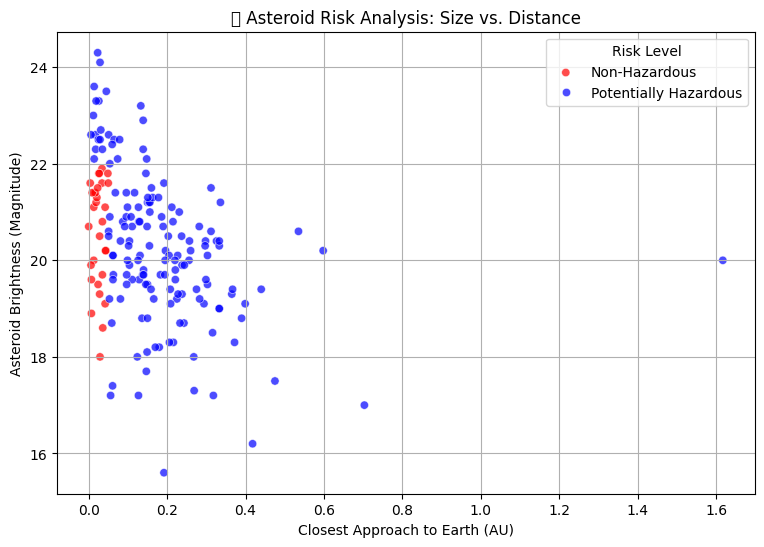


Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00         6

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37


Sample Asteroid Risk Predictions:
     h_mag  moid_au  i_deg         Predicted Risk
29    19.7    0.183  36.71          Non-Hazardous
102   19.4    0.208  39.52          Non-Hazardous
76    19.7    0.063  11.84          Non-Hazardous
112   22.6    0.006   5.43          Non-Hazardous
30    20.6    0.312  31.05          Non-Hazardous
45    19.1    0.042  23.01  Potentially Hazardous
59    21.8    0.026  15.18  Potentially Hazardous
115   18.7    0.233  21.65          Non-Hazardous
201   18.3    0.206  33.26          Non-Hazardous
125   21.5    0.312  25.92          Non-Hazardous


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


url = "https://data.nasa.gov/resource/2vr3-k9wn.csv"
data = pd.read_csv(url)


print("Dataset Columns:", data.columns)


data = data[['designation', 'h_mag', 'moid_au', 'i_deg', 'pha']]


data['pha'] = data['pha'].apply(lambda x: 1 if x == 'Y' else 0)


data[['h_mag', 'moid_au', 'i_deg']] = data[['h_mag', 'moid_au', 'i_deg']].apply(pd.to_numeric, errors='coerce')


data.dropna(inplace=True)


plt.figure(figsize=(9, 6))
sns.scatterplot(x=data['moid_au'], y=data['h_mag'], hue=data['pha'], palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.xlabel('Closest Approach to Earth (AU)')
plt.ylabel('Asteroid Brightness (Magnitude)')
plt.title('🌍 Asteroid Risk Analysis: Size vs. Distance')
plt.legend(labels=['Non-Hazardous', 'Potentially Hazardous'], title='Risk Level')
plt.grid(True)
plt.show()


X = data[['h_mag', 'moid_au', 'i_deg']]
y = data['pha']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("\nPerformance:")
print("Classification Report:\n", classification_report(y_test, y_pred))


X_test_sample = X_test.copy()
X_test_sample['Predicted Risk'] = y_pred
X_test_sample['Predicted Risk'] = X_test_sample['Predicted Risk'].map({0: 'Non-Hazardous', 1: 'Potentially Hazardous'})

print("\nSample Asteroid Risk Predictions:")
print(X_test_sample.head(10))  #first 10 predictions
